In [1]:
import numpy as np
from numpy.matlib import repmat
import matplotlib.pyplot as plt
from load_data import load_skl_data, load_circular_data, load_two_spirals, load_random_classification_dataset
from vicinal_classification import convex_combination, lmbda_vec_beta, cvxcomb_mixup, cvxcomb_mixup_sameclass, cvxcomb_mixup_nearestneighbour, cvxcomb_mixup_sameclass_nearestneighbour
from utilities import visclassifier
from functools import partial

In [2]:
alpha = [0.2, 0.2]
lmbda_vec_func = partial(lmbda_vec_beta, alpha=alpha)
combine_type_func = cvxcomb_mixup_sameclass_nearestneighbour

In [3]:
train_data, train_labels, val_data, val_labels, test_data, test_labels = load_two_spirals(120)

In [4]:
from sklearn.svm import SVC

In [5]:
svc = SVC(C=1.0, kernel='rbf', gamma='auto')
svc.fit(train_data, train_labels)
print(np.mean(svc.predict(train_data) == train_labels), np.mean(svc.predict(val_data) == val_labels), np.mean(svc.predict(test_data) == test_labels))

1.0 0.875 0.875


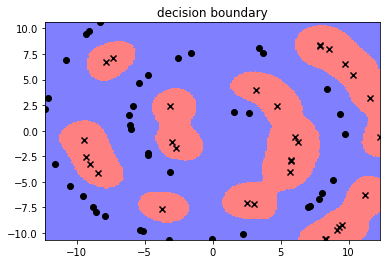

In [6]:
visclassifier(svc.predict, train_data, train_labels, 'decision boundary')

In [7]:
data_perturb, labels_perturb = convex_combination(train_data, train_labels, lmbda_vec_func, 1, combine_type_func, augment=False)

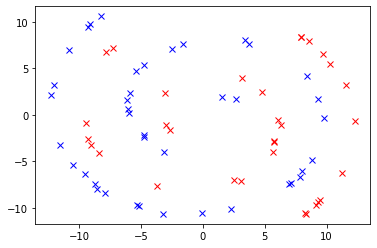

In [8]:
plt.plot(train_data[train_labels == 1, 0], train_data[train_labels == 1, 1], 'rx')
plt.plot(train_data[train_labels == -1, 0], train_data[train_labels == -1, 1], 'bx')
plt.show()

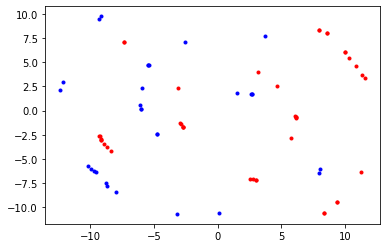

In [9]:
plt.plot(data_perturb[labels_perturb == 1, 0], data_perturb[labels_perturb == 1, 1], 'r.')
plt.plot(data_perturb[labels_perturb == -1, 0], data_perturb[labels_perturb == -1, 1], 'b.')
plt.show()

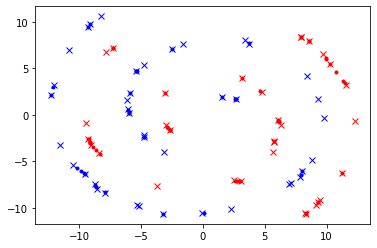

In [10]:
plt.plot(train_data[train_labels == 1, 0], train_data[train_labels == 1, 1], 'rx')
plt.plot(train_data[train_labels == -1, 0], train_data[train_labels == -1, 1], 'bx')
plt.plot(data_perturb[labels_perturb == 1, 0], data_perturb[labels_perturb == 1, 1], 'r.')
plt.plot(data_perturb[labels_perturb == -1, 0], data_perturb[labels_perturb == -1, 1], 'b.')
plt.show()

In [11]:
np.unique(labels_perturb)

array([-1.,  1.])

In [12]:
labels_perturb = np.sign(labels_perturb)

In [13]:
svc_perturb = SVC(C=1.0, kernel='rbf', gamma='auto')
svc_perturb.fit(data_perturb, labels_perturb)
print(np.mean(svc_perturb.predict(data_perturb) == labels_perturb), np.mean(svc_perturb.predict(val_data) == val_labels), np.mean(svc_perturb.predict(test_data) == test_labels))

1.0 0.75 0.7916666666666666


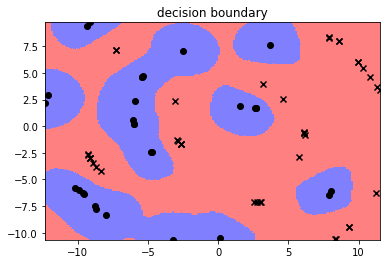

In [14]:
visclassifier(svc_perturb.predict, data_perturb, labels_perturb, 'decision boundary')

In [15]:
data_augment, labels_augment = convex_combination(train_data, train_labels, lmbda_vec_func, 1, combine_type_func, augment=True)

In [16]:
np.unique(labels_augment)

array([-1.,  1.])

In [17]:
labels_augment = np.sign(labels_augment)

In [18]:
svc_augment = SVC(C=1.0, kernel='rbf', gamma='auto')
svc_augment.fit(data_augment, labels_augment)
print(np.mean(svc_augment.predict(data_augment) == labels_augment), np.mean(svc_augment.predict(val_data) == val_labels), np.mean(svc_augment.predict(test_data) == test_labels))

1.0 0.875 0.875


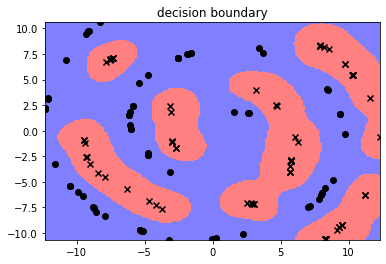

In [19]:
visclassifier(svc_augment.predict, data_augment, labels_augment, 'decision boundary')